# Лабораторная работа №3

## Регрессионная модель изменения цен на дома в Бостоне

### Цель
Реализовать предсказание медианной цены на дома в пригороде Бостона в середине 1970-
х по таким данным, как уровень преступности, ставка местного имущественного налога и т.
д.
Данный набор содержит относительно немного образцов данных: всего 506, разбитых на
404 обучающих и 102 контрольных образца. И каждый признак во входных данных
(например, уровень преступности) имеет свой масштаб. Например, некоторые признаки
являются пропорциями и имеют значения между 0 и 1, другие — между 1 и 12 и т. д.
Не путайте регрессию с алгоритмом логистической регрессии. Как ни странно,
логистическая регрессия не является регрессионным алгоритмом — это алгоритм
классификации.
## Задачи
1. Ознакомиться с задачей регрессии
2.  Изучить отличие задачи регрессии от задачи классификации
3. Создать модель
4. Настроить параметры обучения
5. Обучить и оценить модели
6. Ознакомиться с перекрестной проверкой

Линейная регрессия-это подгонка прямой линии в данных, в то время как логистическая регрессия-подгонка кривой к данным. Линейная регрессия-это алгоритм регрессии для машинного обучения, а логистическая регрессия-алгоритм классификации для машинного обучения.

## Выполнение работы

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


404 обучающих и 102 контрольных образца, каждый с 13 числовыми признаками.
Цены в основном находятся в диапазоне от 10 000 до 50 000 долларов США.
Было бы проблематично передать в нейронную сеть значения, имеющие самые разные
диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным
данным, однако это усложнит обучение. На практике к таким данным принято применять
нормализацию: для каждого признака во входных данных (столбца в матрице входных
данных) из каждого значения вычитается среднее по этому признаку, и разность делится
на стандартное отклонение, в результате признак центрируется по нулевому значению и
имеет стандартное отклонение, равное единице. Такую нормализацию легко выполнить с
помощью Numpy.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

def chart_create(num, min_x, max_x, min_y, max_y, label):
    dpi=80
    plt.figure(num = num, dpi = dpi, figsize = (1024 / dpi, 512 / dpi))
    mpl.rcParams.update({'font.size':10})
    plt.axis([min_x, max_x, min_y, max_y])
    
    plt.title(label + 'Chart')
    plt.xlabel('Epoch')
    plt.ylabel(label)
    
def chart_printline(num, x_values, y_values, label):
    plt.figure(num = num)
    
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(x_values, y_values, color = color, linestyle = 'solid', label = label)
    plt.legend(loc = 'upper left')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3705374896526337


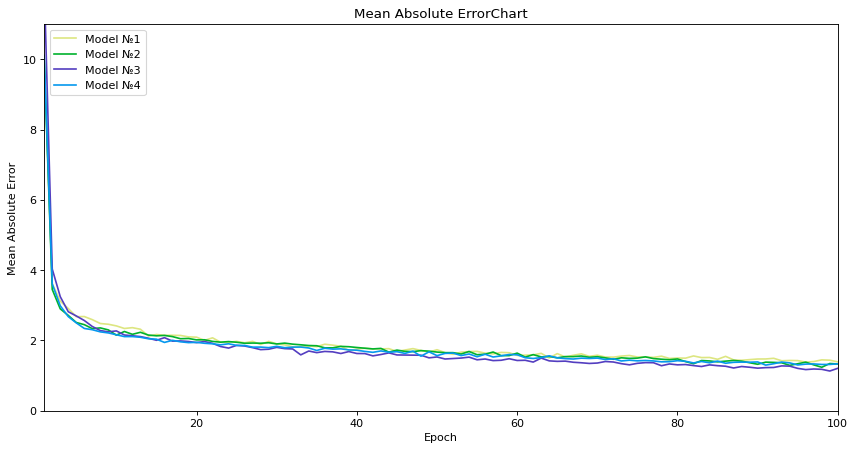

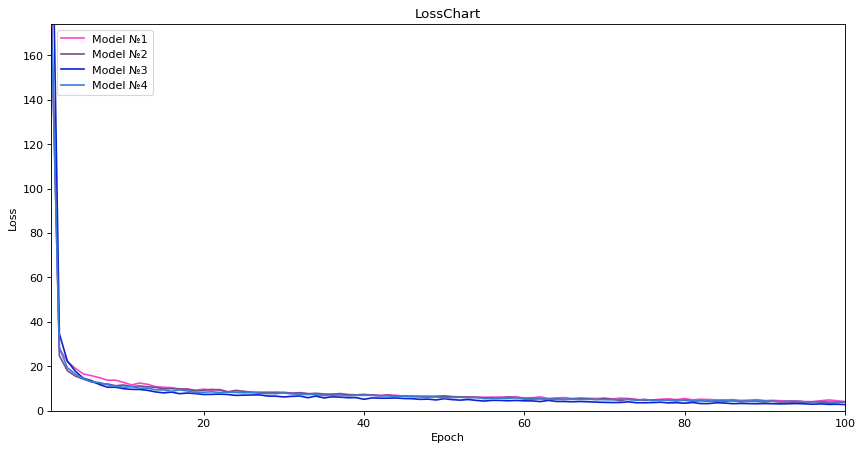

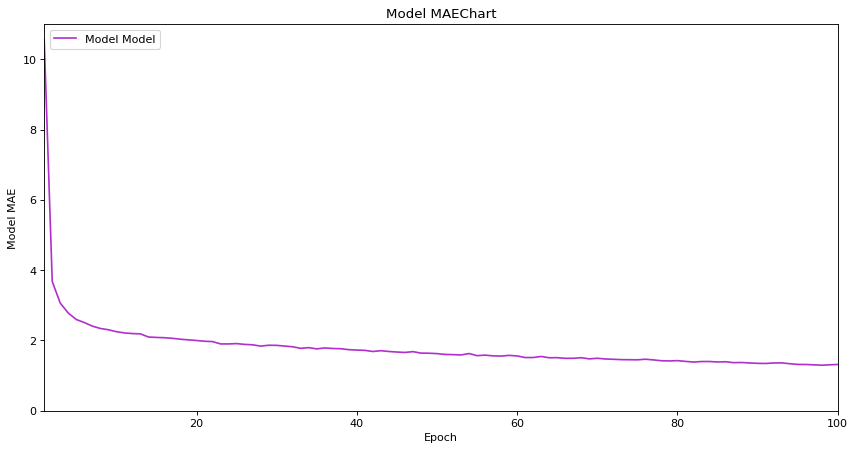

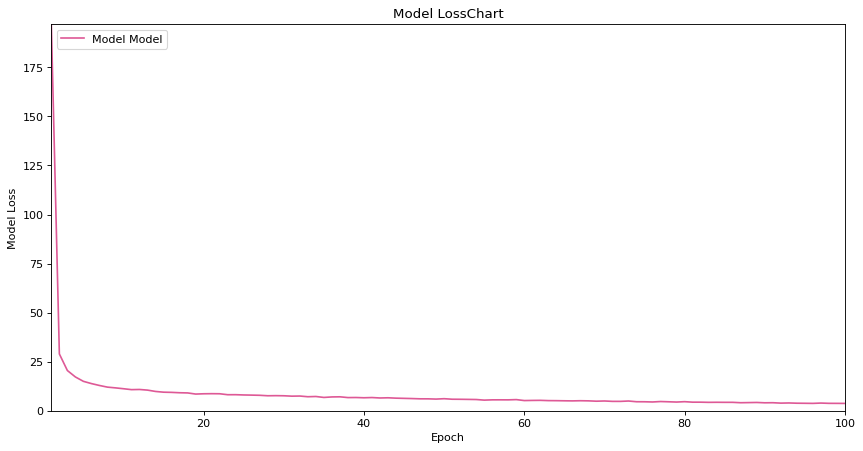

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

Сеть заканчивается одномерным слоем, не имеющим функции активации (это линейный
слой). Это типичная конфигурация для скалярной регрессии (целью которой является
предсказание одного значения на непрерывной числовой прямой). Применение функции
активации могло бы ограничить диапазон выходных значений: например, если в последнем
слое применить функцию активации sigmoid, сеть обучилась бы предсказывать только
значения из диапазона между 0 и 1.
В данном случае, с линейным последним слоем, сеть способна предсказывать значения из
любого диапазона.
Обратите внимание на то, что сеть компилируется с функцией потерь mse — mean squared
error (среднеквадратичная ошибка), вычисляющей квадрат разности между
предсказанными и целевыми значениями. Эта функция широко используется в задачах
регрессии. Также добавлен новый параметр на этапе обучения: mae — mean absolute error
(средняя абсолютная ошибка). Это абсолютное значение разности между предсказанными
и целевыми значениями. Например, значение MAE, равное 0,5, в этой задаче означает, что
в среднем прогнозы отклоняются на 500 долларов США.
Чтобы оценить качество сети в ходе корректировки ее параметров (таких, как количество
эпох обучения), можно разбить исходные данные на обучающий и проверочный наборы,
как это делалось в предыдущих примерах. Однако так как у нас и без того небольшой набор
данных, проверочный набор получился бы слишком маленьким (скажем, что-нибудь около
100 образцов). Как следствие, оценки при проверке могут сильно меняться в зависимости
от того, какие данные попадут в проверочный и обучающий наборы: оценки при проверке
могут иметь слишком большой разброс. Это не позволит надежно оценить качество
модели.
Хорошей практикой в таких ситуациях является применение перекрестной проверки по K
блокам (K-fold cross-validation). Суть ее заключается в разделении доступных данных на K
блоков (обычно K = 4 или 5), создании K идентичных моделей и обучении каждой на K—1
блоках с оценкой по оставшимся блокам. По полученным K оценкам вычисляется среднее
значение, которое принимается как оценка модели. В коде такая проверка реализуется
достаточно просто.

Разные прогоны действительно показывают разные оценки, от 2,6 до 3,2. Средняя (3,0)
выглядит более достоверно, чем любая из оценок отдельных прогонов, — в этом главная
ценность перекрестной проверки по K блокам. В данном случае средняя ошибка составила
3000 долларов, что довольно много, если вспомнить, что цены колеблются в диапазоне от
10 000 до 50 000 долларов.
 Необходимо уменьшить или увеличить количество эпох обучения и
проанализировать полученные результаты
## Требования
1. Объяснить различия задач классификации и регрессии
2. Изучить влияние кол-ва эпох на результат обучения модели
3. Выявить точку переобучения
4. Применить перекрестную проверку по K блокам при различных K
5. Построить графики ошибки и точности во время обучения для моделей, а также
усредненные графики по всем моделям

## Вопрос 1
Линейная регрессия-это подгонка прямой линии в данных, в то время как логистическая регрессия-подгонка кривой к данным. Линейная регрессия-это алгоритм регрессии для машинного обучения, а логистическая регрессия-алгоритм классификации для машинного обучения.

## Вопрос 2
### Количество эпох равное 60

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.361886650323868


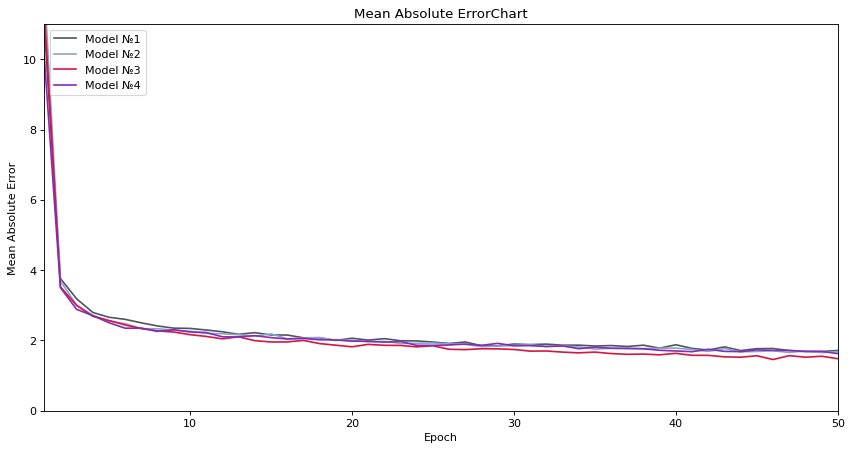

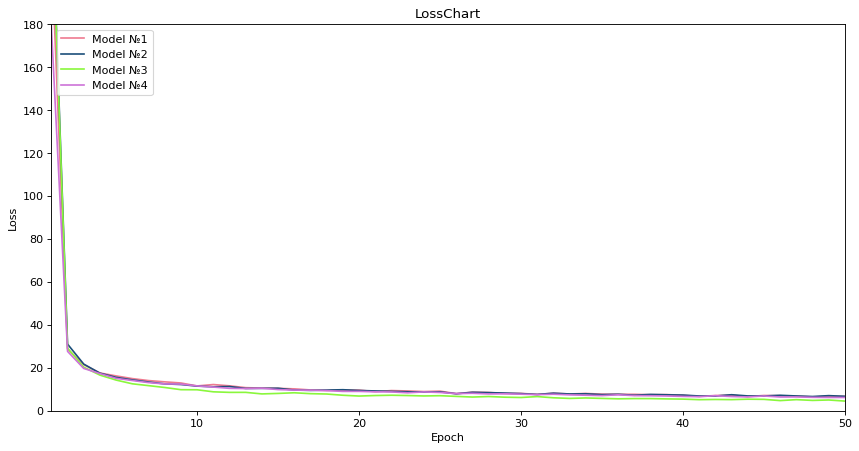

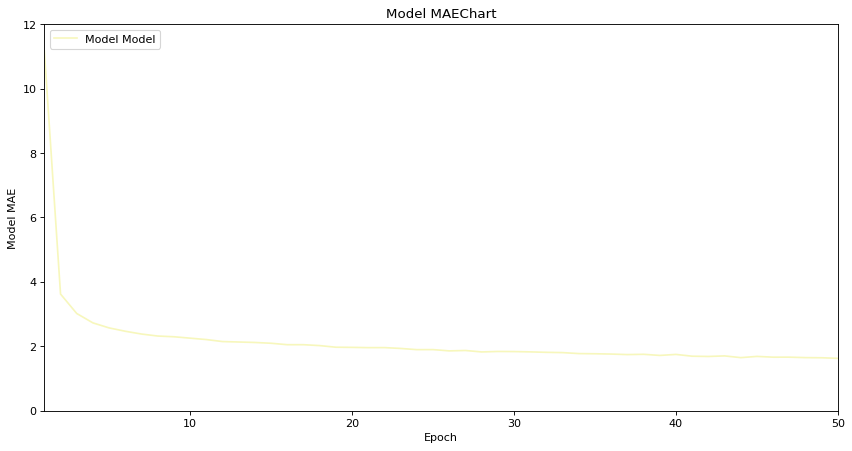

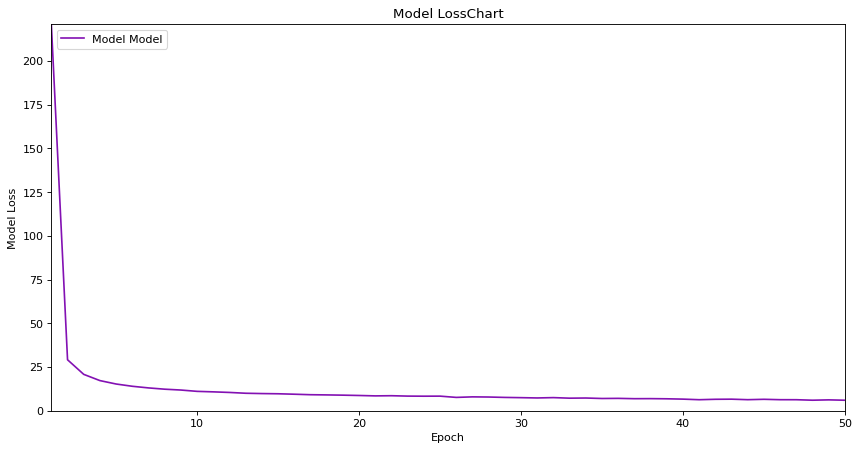

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

## Количество эпох равное 155

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.591777741909027


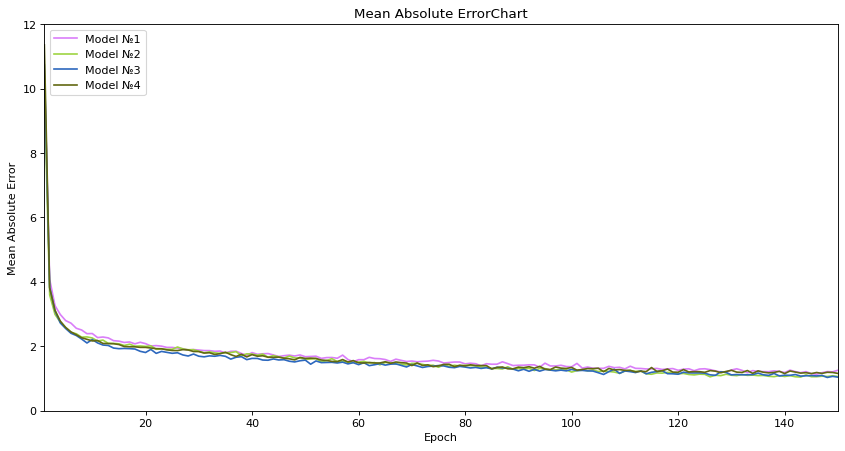

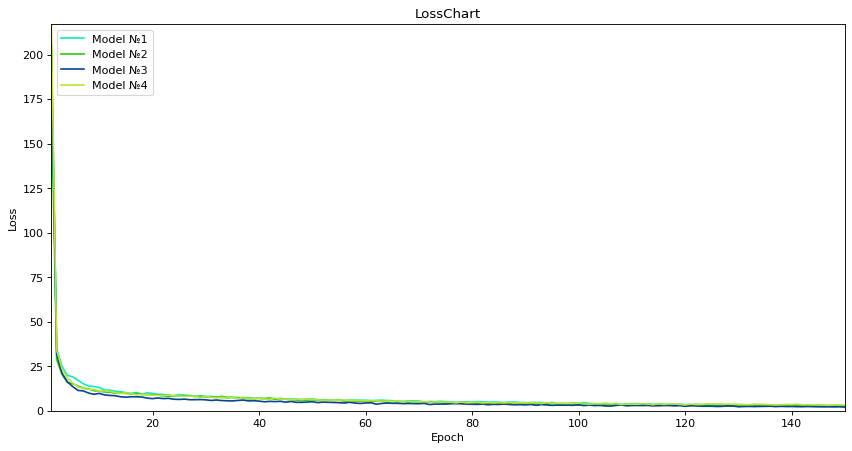

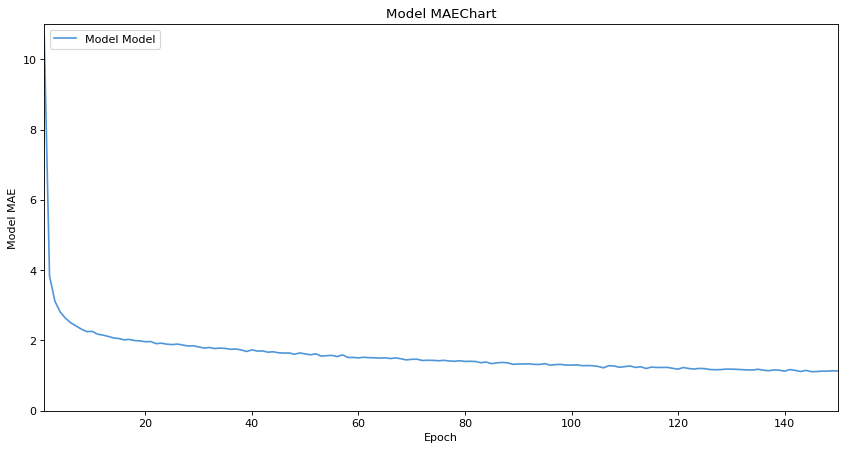

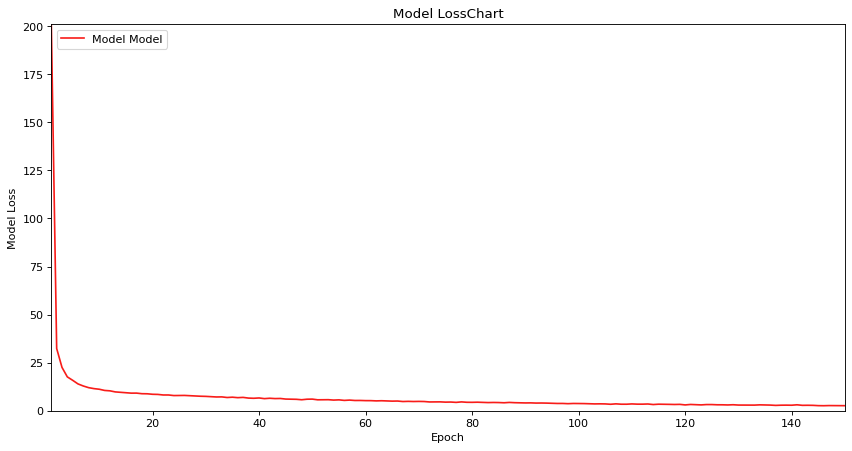

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

### Количество эпох равное 180

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4335864186286926


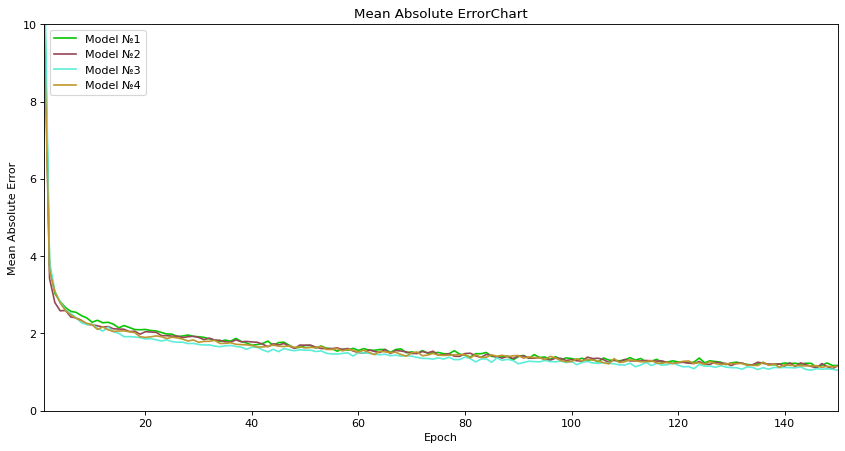

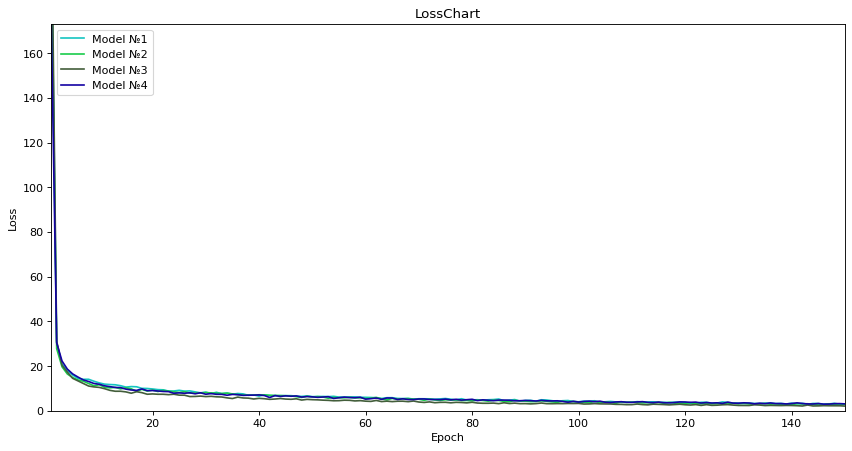

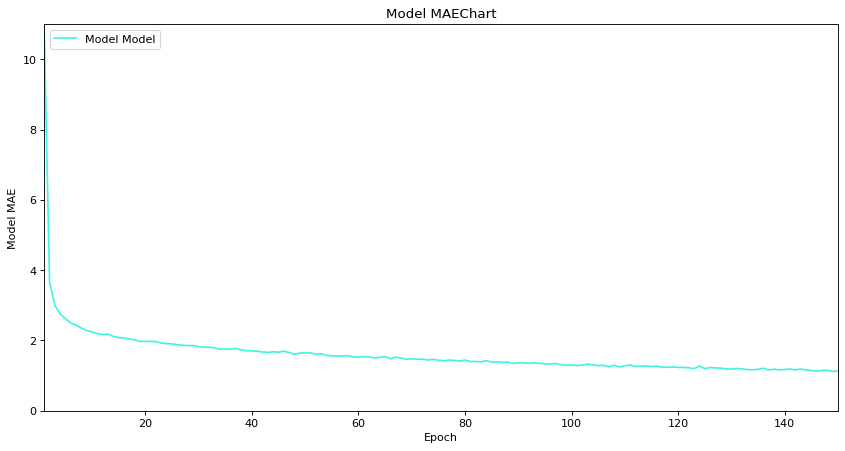

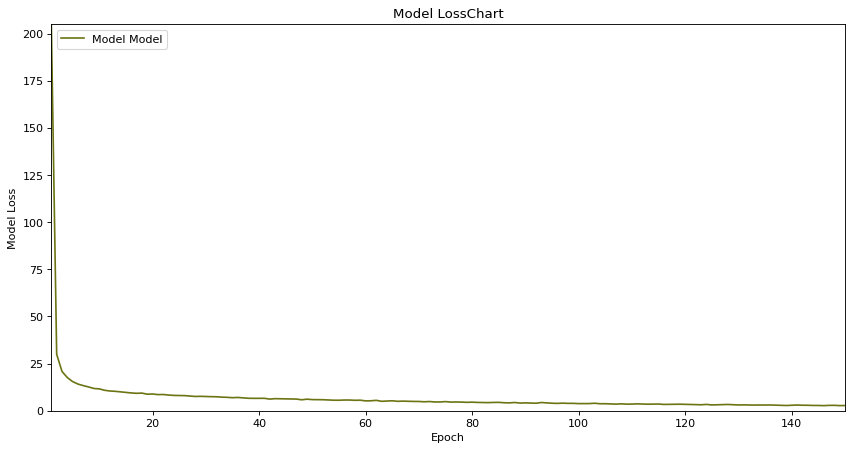

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')


## Вопрос 3
Модель переобучается, когда количество эпох становится больше 150.

## Вопрос 4
## Количество К = 5

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.440383291244507


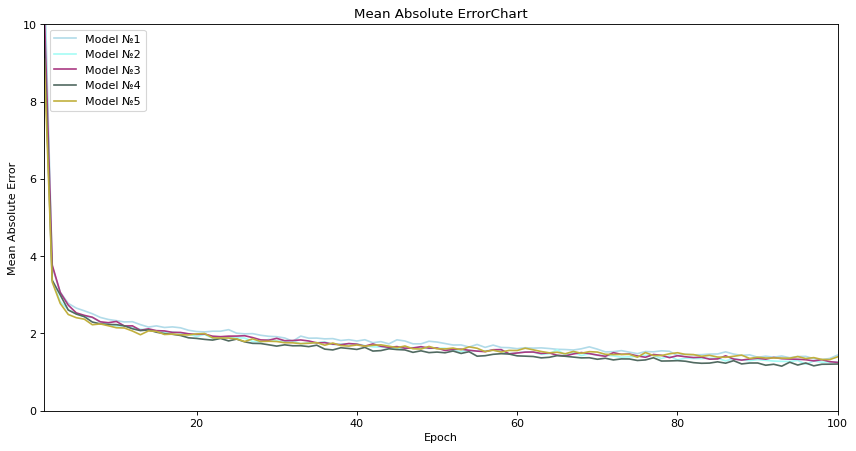

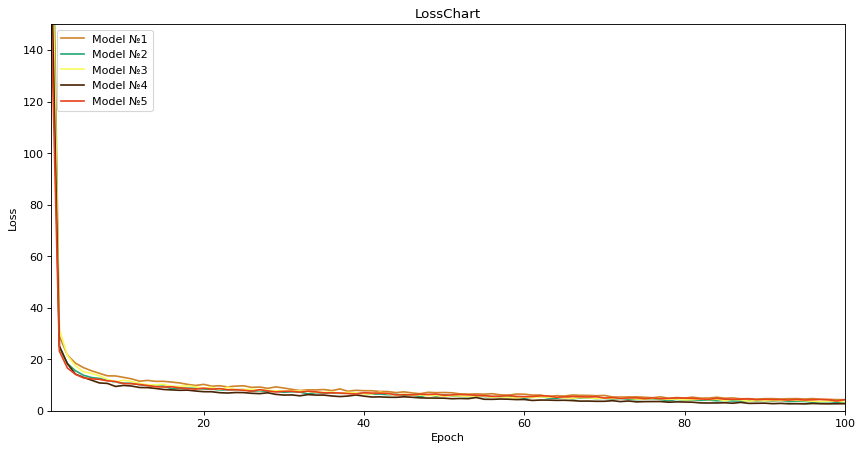

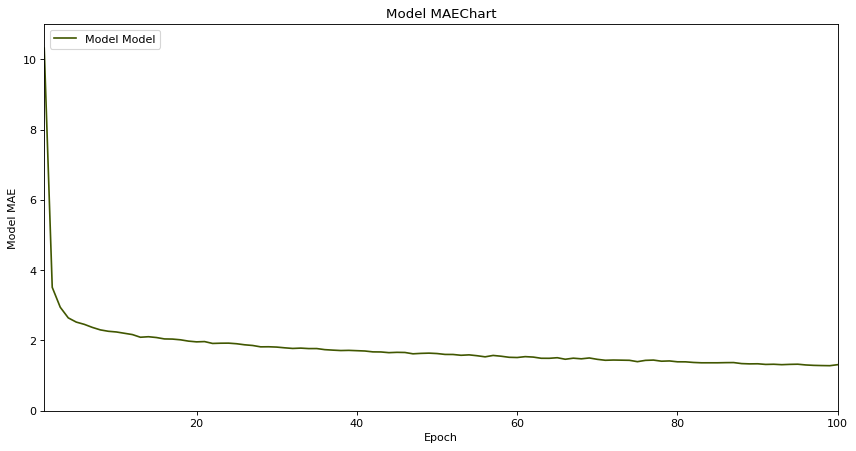

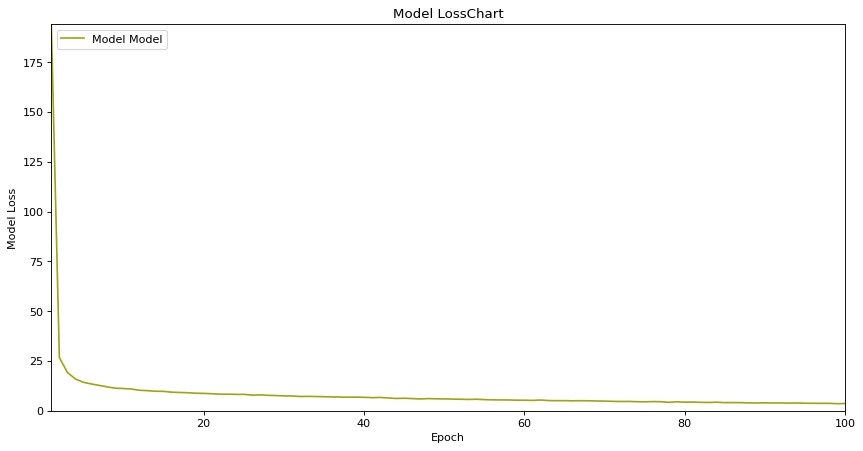

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')